### Part 0: Determining PVs of Interest

Not observing: 
- ACCL
- anything starting with V
- YAGS

Observing: 
TORO (gives us an idea about the charge of the particle)
XCOR, YCOR (dipole correctors in specific directions)
BPM
BPMS: HTR
BPMS: L0B

In order: 
1. SOLN:GUNB:100:BACT
2. QUAD:GUNB:212:1:BACT
3. SOLN:GUNB:212:BACT
4. QUAD:GUNB:212:2:BACT
5. XCOR:GUNB:293:BACT
6. YCOR:GUNB:293:BACT
7. BPMS:GUNB:314:X, BPMS:GUNB:314:Y
8. TORO:GUNB:360:CHRG
9. XCOR:GUNB:388:BACT
10. YCOR:GUNB:388:BACT
11. XCOR:GUNB:513:BACT
12. YCOR:GUNB:513:BACT
13. XCOR:GUNB:713:BACT
14. YCOR:GUNB:713:BACT
15. QUAD:GUNB:823:1:BACT
16. SOLN:GUNB:823:BACT
17. QUAD:GUNB:823:2:BACT
18. BPMS:GUNB:925:X, BPMS:GUNB:925:Y
19. XCOR:GUNB:927:BACT
20. YCOR:GUNB:927:BACT
21. BPMS:L0B:0183:X_SLOW, BPMS:L0B:0183:Y_SLOW
22. BPMS:HTR:120:X_SLOW, BPMS:HTR:120:Y_SLOW


### Part 1: Test Plotting Raw Data From ArchViewer

Step 1: Start by looking at the data for a small timeframe using the PV "SOLN:GUNB:100"
- test 1 minute vs 5 minutes vs 15 minutes to see if there are timeframe gaps or if all the data is actually saved

Step 2: Clean the data if necessary, save in a function

Step 3: Visualize with matplotlib, save in a function

Step 4: Develop a filtering function that only analyzes the peaks and returns timestamps for the max and the width of the peak

In [240]:
import numpy as np
import pandas as pd

In [241]:
# get average length of non-NA data points of each 1m interval for the 1m, 1h, and 1d csv files 

soln_gunb_100_df_1m = pd.read_csv("1m-soln-gunb-100.csv")
soln_gunb_100_df_5m = pd.read_csv("5m-soln-gunb-100.csv")
soln_gunb_100_df_15m = pd.read_csv("15m-soln-gunb-100.csv")

"""for a df, for every column, get its length, ignoring the NA cells, and return the average length""" 
def get_length_avg_no_NA(df_name): 
    col_sum = 0
    for column_name in df_name: 
        col_length = len(df_name[column_name].dropna())
        col_sum += col_length
    return col_sum / len(df_name.columns)

# return values

print(f"Length of 1m column: {get_length_avg_no_NA(soln_gunb_100_df_1m)}")
print(f"Length of 5m column: {get_length_avg_no_NA(soln_gunb_100_df_5m)}")
print(f"Length of 15m column: {get_length_avg_no_NA(soln_gunb_100_df_15m)}")

Length of 1m column: 10.525
Length of 5m column: 40.975
Length of 15m column: 231.2


In conclusion, this roughly scales linearly, so it's not like the ArchViewer is hiding data for larger timestamps. 

It was discovered that when you save data, a good chunk of it is taken from a completely different day. So the best way to deal with this issue is to get the first several characters, get the most common date (since we only care about a single day), and filter out the undesired rows. 

In [242]:
# test filtering out irrelevant dates using the 1m df 

soln_gunb_100_df_1m["Timestamp"][0][0:10]

test_timestamp_list = soln_gunb_100_df_1m["Timestamp"].tolist()
date_only_list = [x[0:10] for x in test_timestamp_list] # list with only dates

from collections import Counter
date_counts_dict = Counter(date_only_list)
common_date = date_counts_dict.most_common(1)[0][0] # get the most common date

# only get rows that have the common date 

common_date_only_list = [x if x == common_date else None for x in date_only_list]
none_length = len([x for x in common_date_only_list if x == None])
filtered_soln_gunb_100_df_1m = soln_gunb_100_df_1m.iloc[none_length:, 0:]

filtered_soln_gunb_100_df_1m.head(3)

,Timestamp,SOLN:GUNB:100:ACCESS,SOLN:GUNB:100:BACT,SOLN:GUNB:100:BCON,SOLN:GUNB:100:BCTRL,SOLN:GUNB:100:BDES,SOLN:GUNB:100:BLEM,SOLN:GUNB:100:BMAGX,SOLN:GUNB:100:BMAGY,SOLN:GUNB:100:BMOD,...,SOLN:GUNB:100:PTRBDISABLE,SOLN:GUNB:100:RAMPSTATE,SOLN:GUNB:100:STATE,SOLN:GUNB:100:STATESETPT,SOLN:GUNB:100:STATMSG,SOLN:GUNB:100:STDZDISABLE,SOLN:GUNB:100:STDZOK,SOLN:GUNB:100:TRIMDISABLE,SOLN:GUNB:100:TRIMIFINTOL,SOLN:GUNB:100:UNAVAIL
16,2024/06/18 12:32:44.647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2024/06/18 12:32:44.648,NaN,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2024/06/18 12:32:45.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part 2: Data Cleaning Functions

Now that we have strategies for data cleaning, we can consolidate these approaches of: 
- getting data from a column
- removing NaN rows
- removing irrelevant dates

In [243]:
from collections import Counter

"""Returns the ratio of normal elements to total cells"""
def get_non_na_ratio(df_name, col_name): 
    tot_len = len(df_name[col_name])
    na_len = tot_len - len(df_name[col_name].dropna())
    return (tot_len - na_len) / tot_len

"""Returns a df with irrelevant rows removed"""
def remove_irrelevant_dates(df_name): 
    test_timestamp_list = df_name["Timestamp"].tolist()
    date_only_list = [x[0:10] for x in test_timestamp_list] # list with only dates

    date_counts_dict = Counter(date_only_list)
    common_date = date_counts_dict.most_common(1)[0][0] # get the most common date

    # only get rows that have the common date 

    common_date_only_list = [x if x == common_date else None for x in date_only_list]
    none_length = len([x for x in common_date_only_list if x == None])
    filtered_df = df_name.iloc[none_length:, 0:]
    return filtered_df

"""Returns a df with a single column without NA values"""
def remove_nan_from_col(df_name, col_name): 
    new_df = df_name[pd.notna(df_name[col_name])]
    return new_df[["Timestamp", col_name]]

"""Returns a df without the date and hour in the Timestamp"""
def remove_date(df_name): 
    timestamps = df_name["Timestamp"]
    result_timestamps = [x[14:] for x in timestamps]
    result_df = df_name.copy()
    result_df["Timestamp"] = result_timestamps
    return result_df

Now, we can plot any column we like. Below is a test plot of "SOLN:GUNB:100:BACT." This will then be summarized in functions and repurposed to generate an altogether plot of all the interesting data. 

Normal element to total ratio: 0.3612662942271881


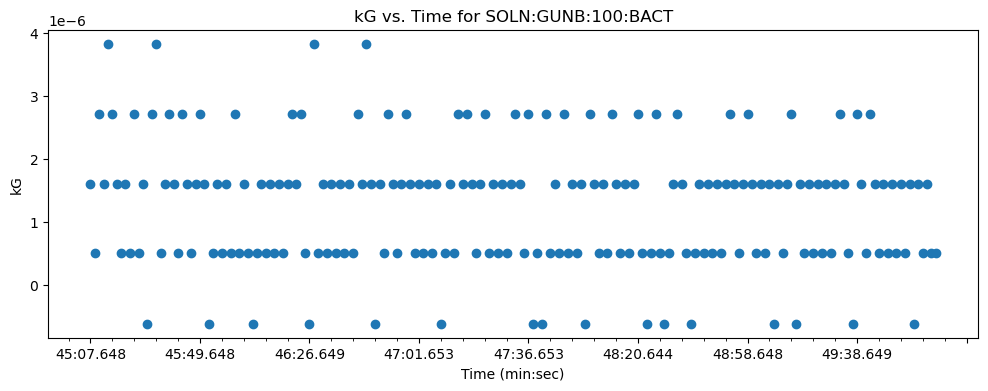

In [244]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12, 4))

print(f"Normal element to total ratio: {get_non_na_ratio(soln_gunb_100_df_5m, "SOLN:GUNB:100:BACT")}") # get normal/total ratio
soln_gunb_100_df_5m_rows = remove_irrelevant_dates(soln_gunb_100_df_5m) # remove irrelevant rows
soln_gunb_100_df_5m_cols = remove_nan_from_col(soln_gunb_100_df_5m_rows, "SOLN:GUNB:100:BACT") # remove unwanted columns
soln_gunb_100_df_5m_plot = remove_date(soln_gunb_100_df_5m_cols) # modify timestamp text to only include the hour, min, and sec

ax.scatter(soln_gunb_100_df_5m_plot["Timestamp"], soln_gunb_100_df_5m_plot["SOLN:GUNB:100:BACT"])

# x label is always in seconds, but y label must be specified by the user as it is not given in the csv file
ax.set_xlabel("Time (min:sec)")
ax.set_ylabel("kG")
ax.set_title("kG vs. Time for SOLN:GUNB:100:BACT")

ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

### Part 3: Defining Plotting Functions  

These functions work on csvs that were downloaded, imported, and converted to DataFrames from the Archive Viewer website. 

Generating plots: 
1. `specific_col_plot` Plot of a specific column
2. `megaplot_all_cols` Megaplot of all the columns from the dataframe

Generating correlations: 

3. `spec_correl` Plot of a specific correlation between two specific dataframes and their specified columns

NOTE: 
- These functions are not very object oriented, and they're not necessarily meant to be used outside of a jupyter notebook environment
- If needed, a more modular approach can be developed, and it could automate access to the online database through web scraping/automation bots

In [245]:
"""Grid plotter helper function for megaplots"""
def plot_mega(ax, df_name, y_axis_title, i, j, col_ind): 
    df_rows = remove_irrelevant_dates(df_name) # remove irrelevant rows

    if col_ind >= len(df_rows.columns): # ends execution of for loop if no more columns to render
        return
    
    df_cols = remove_nan_from_col(df_rows, df_rows.columns[col_ind]) # remove unwanted columns
    df_plot = remove_date(df_cols) # modify timestamp text to only include the hour, min, and sec

    ax[i, j].scatter(df_plot["Timestamp"], df_plot[df_rows.columns[col_ind]], s=10)
    ax[i, j].xaxis.set_major_locator(ticker.LinearLocator(3))
    ax[i, j].xaxis.set_minor_locator(ticker.LinearLocator(0))
    ax[i, j].tick_params(axis='y', which='major', labelsize=8)
    ax[i, j].tick_params(axis='x', which='major', labelsize=8)
    ax[i, j].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    # x label is always in seconds, but y label must be specified by the user as it is not given in the csv file
    ax[i, j].set_xlabel("Time (min:sec)")
    ax[i, j].set_ylabel(y_axis_title)
    ax[i, j].set_title(f"{y_axis_title} vs. Time for {df_rows.columns[col_ind]}", {'fontsize': 7})

"""Plot of a specific column in a df"""
def specific_col_plot(df_name, col_name, y_axis_title): 
    fig, ax = plt.subplots(figsize=(12, 4))
    print(f"Normal element to total ratio: {get_non_na_ratio(df_name, col_name)}") # get normal/total ratio
    df_rows = remove_irrelevant_dates(df_name) # remove irrelevant rows
    df_cols = remove_nan_from_col(df_rows, col_name) # remove unwanted columns
    df_plot = remove_date(df_cols) # modify timestamp text to only include the hour, min, and sec

    ax.scatter(df_plot["Timestamp"], df_plot[col_name])

    # x label is always in seconds, but y label must be specified by the user as it is not given in the csv file
    ax.set_xlabel("Time (min:sec)")
    ax.set_ylabel(y_axis_title)
    ax.set_title(f"{y_axis_title} vs. Time for {col_name}")

    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

"""Megaplot of all the columns from the df"""
def megaplot_all_cols(df_name, y_axis_title): 
    # want to create a grid of subplots
    col_len = len(df_name.columns) - 1
    dim = int(np.sqrt(col_len))
    # the following two lines are subject to change with increasing dimension
    fig, ax = plt.subplots(dim + 1, dim, figsize=(17, 15))
    plt.subplots_adjust(wspace=0.4, hspace=1)
    col_ind = 1 # track index of the columns in the df that will be cleaned in the for loop
    for i in range(0, dim + 1): 
        for j in range(0, dim):
            plot_mega(ax, df_name, y_axis_title, i, j, col_ind)
            col_ind += 1 # keep track of which column is being plotted


In [246]:
"""Plot of a specific correlation between two specific dataframes and their specified columns"""
def spec_correl(df_x, df_y, df_col_x, df_col_y): 
    # clean both dfs
    df_plot_x = clean_df(df_x, df_col_x)
    df_plot_y = clean_df(df_y, df_col_y)
    # plot dfs
    fig, ax = plt.subplots(figsize=(12, 4))
    print(f"Normal element to total ratio x: {get_non_na_ratio(df_x, df_col_x)}") # get normal/total ratio
    print(f"Normal element to total ratio y: {get_non_na_ratio(df_y, df_col_y)}") 
    ax.scatter(df_plot_x[df_col_x], df_plot_y[df_col_y])
    # x label is always in seconds, but y label must be specified by the user as it is not given in the csv file
    ax.set_xlabel(df_col_x)
    ax.set_ylabel(df_col_y)
    ax.set_title(f"{df_col_y} vs. {df_col_x}")
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())

"""Helper function to clean df"""
def clean_df(df, col): 
    df_rows = remove_irrelevant_dates(df) # remove irrelevant rows 
    df_cols = remove_nan_from_col(df_rows, col) # df with only the one specified col df_col_x
    return remove_date(df_cols) # modify timestamp text to only include the hour, min, and sec
    

### Part 4: Isolating Peaks

For some PVs, rather than continual, steady oscillation, there are clear peaks in data points. We want to isolate these and only return those data points before plotting these columns and their correlations. 

### Part 5: Example Plots

The following plots are simple tests, and more can be generated as needed when testing the visual viewer's results in comparison to what can be achieved with MEME or the archive script from lcls-tools.

Normal element to total ratio: 0.392


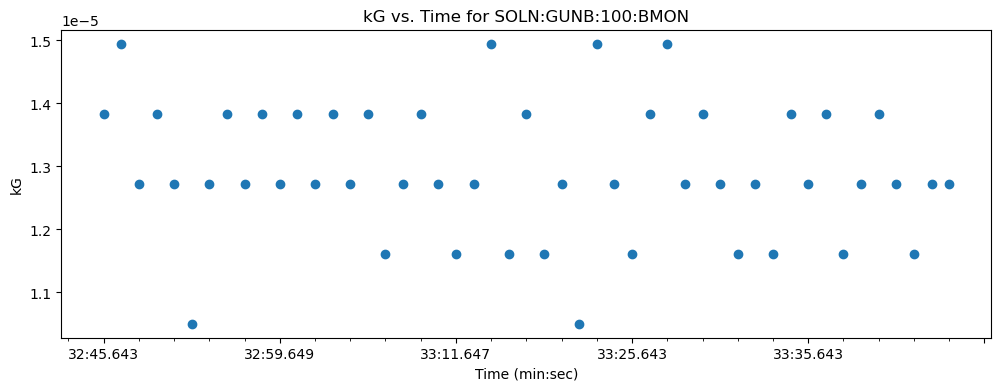

In [247]:
specific_col_plot(soln_gunb_100_df_1m, "SOLN:GUNB:100:BMON", "kG")

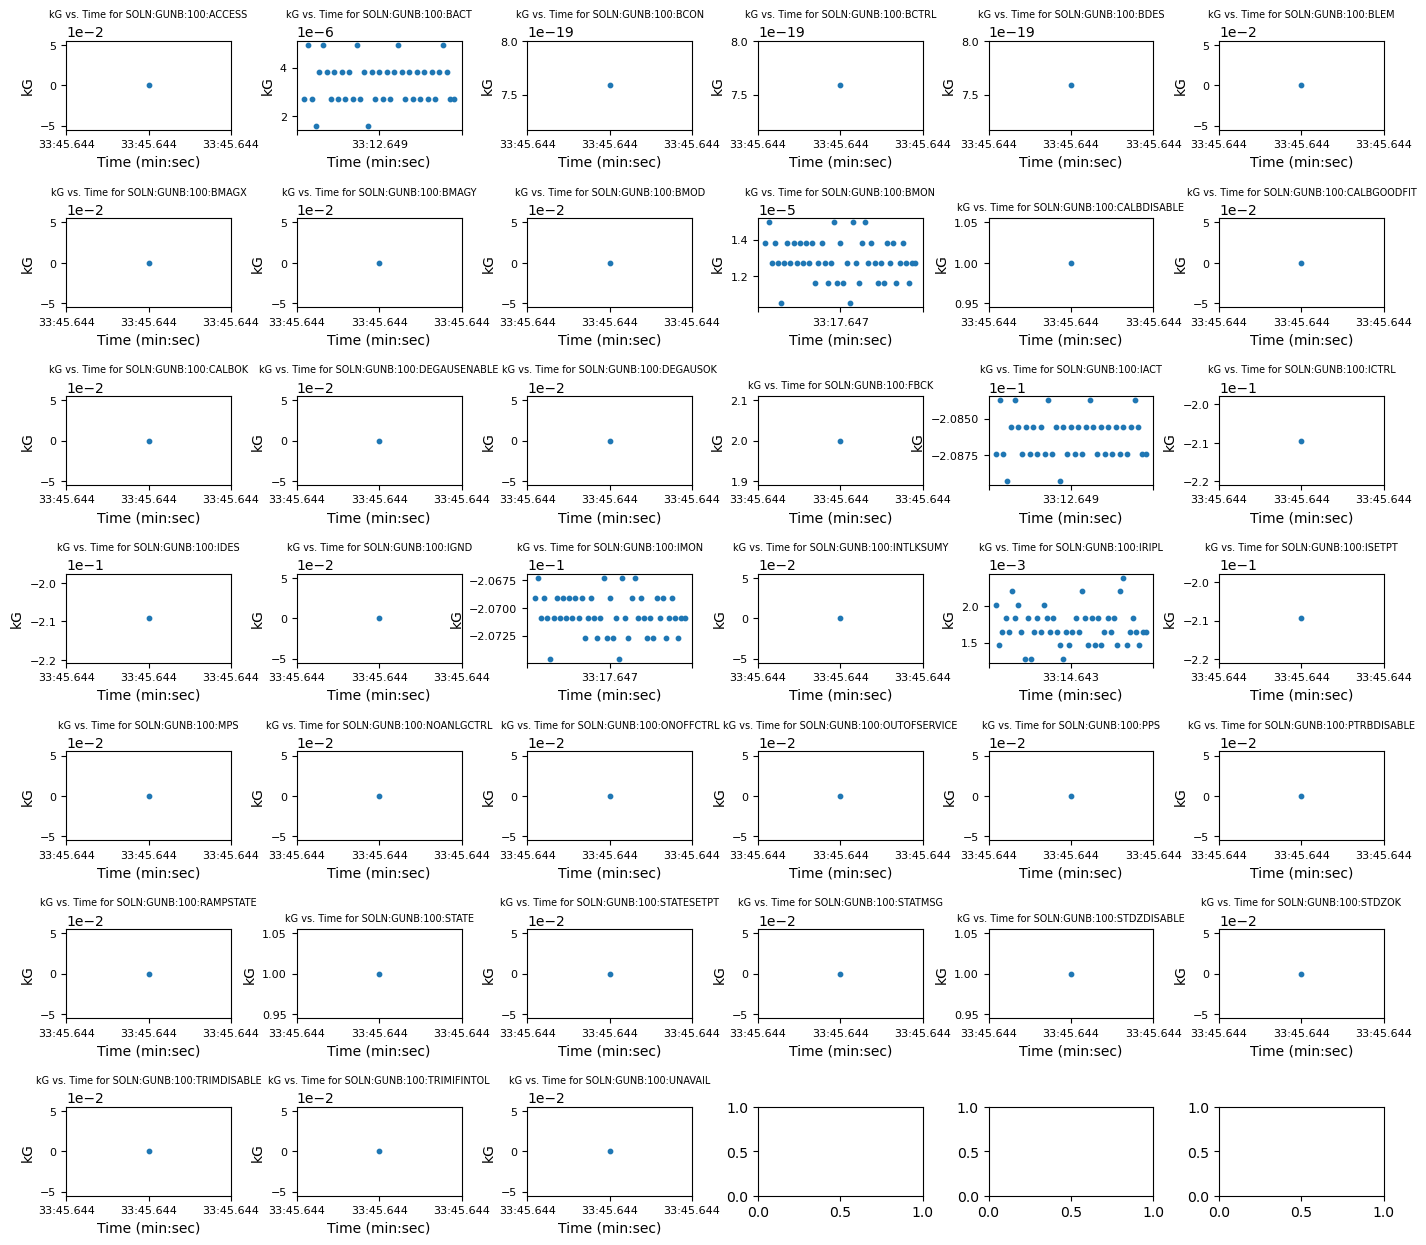

In [248]:
megaplot_all_cols(soln_gunb_100_df_1m, "kG")

Normal element to total ratio x: 0.392
Normal element to total ratio y: 0.392


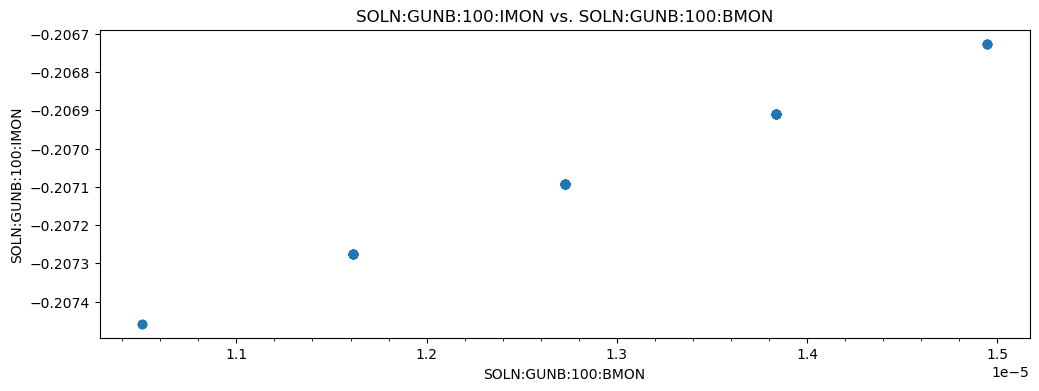

In [249]:
spec_correl(soln_gunb_100_df_1m, soln_gunb_100_df_1m, "SOLN:GUNB:100:BMON", "SOLN:GUNB:100:IMON")

### Next Steps

Although now we have useful functions that can be used to draw correlations between different components along the beamline, it is still cumbersome to go to the visual tool, click on several buttons, download the files, convert them to dataframes, and then feed them into functions. 

A future extension can be to write a selenium python bot to automatically search for a PV, select a timeframe, download the file, and convert it to a dataframe. This can then be applied to the various other existing functions. 

This would involve adding all the desired PVs, specifying a start and end time, and downloading the file as a csv. However, this would be impractical as the csv file would grow dramatically in size as the timeframe increased, so ultimately using ArchViewer would be impossible if one desires to analyze peaks over long periods of time. 